<a href="https://colab.research.google.com/github/mayowaoyaleke/Customer_Segmentation_Clustering/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

**What is Customer Segmentation?**

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**Why Segment Customers?**

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

* Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).

* Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. 

* Identify ways to improve products or new product or service opportunities.

* Establish better customer relationships.

* Test pricing options.

* Focus on the most profitable customers.

* Improve customer service.

* Upsell and cross-sell other products and services.

This built model would be used to segment customers of a mall based on their spending behaviour and purchasing data to understand the customers who are likely to be [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Data Description

This Data was sourced from kagggle repository.

This small dataset has a total of 5 columns, and 100+ rows.

Columns include: **CustomerID**, **Gender**, **Age**, **AnnualIncome**, **SpendingScore**

# Data Dictionary

1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k$): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

# Model Building


### Importing Libraries

In [ ]:
# Data Exploration and Transformation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objects as graph_objects

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Model Building
from sklearn.cluster import KMeans



### Data Importation

In [ ]:
# Importing Data from file path
df = pd.read_csv("/content/drive/MyDrive/Wragby Customer Segmentation POC/Mall_Customers.csv")


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Eploratory Data Analytics

In [ ]:
# Check for Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check for available columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Check for nos of rows and columns
df.shape

(200, 5)

In [ ]:
# Find statistical information on data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Find Null Values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Rename Columns 
df.rename(columns = {"Annual Income (k$)": "Annual Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


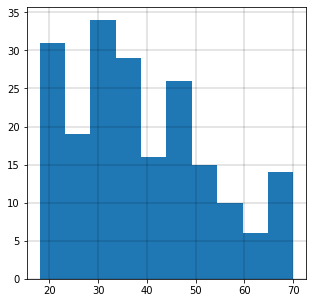

In [ ]:
# Check Distribution of Age
fig, ax =  plt.subplots(figsize = (5,5))
ax.hist(df['Age'])
ax.grid(color='black', linestyle='-', linewidth=0.2)

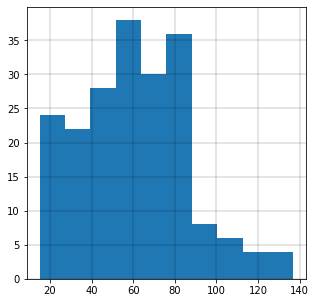

In [ ]:
# Check Distribution of Annual Income
fig, ax =  plt.subplots(figsize = (5,5))
ax.hist(df['Annual Income'])
ax.grid(color='black', linestyle='-', linewidth=0.2)

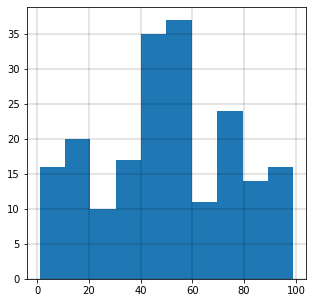

In [ ]:
# Check Distribution of Spending Score
fig, ax =  plt.subplots(figsize = (5,5))
ax.hist(df['Spending Score'])
ax.grid(color='black', linestyle='-', linewidth=0.2)

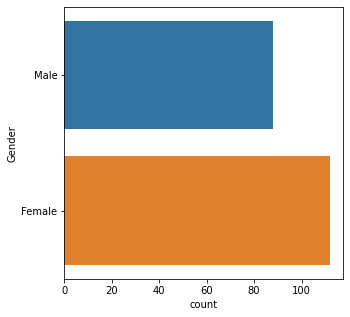

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(y = 'Gender', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

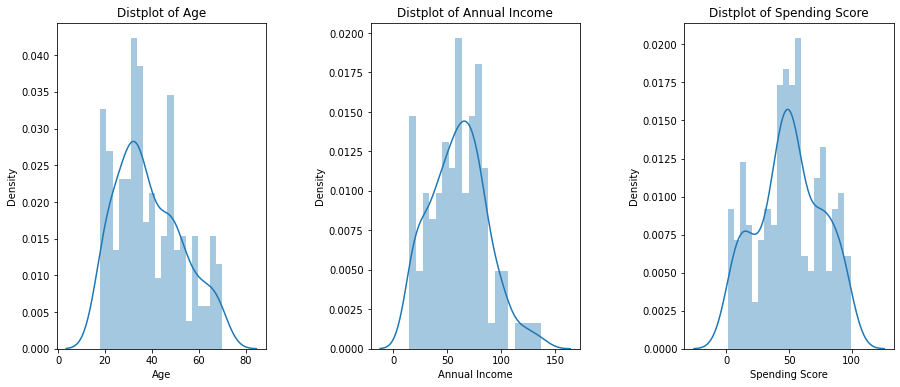

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

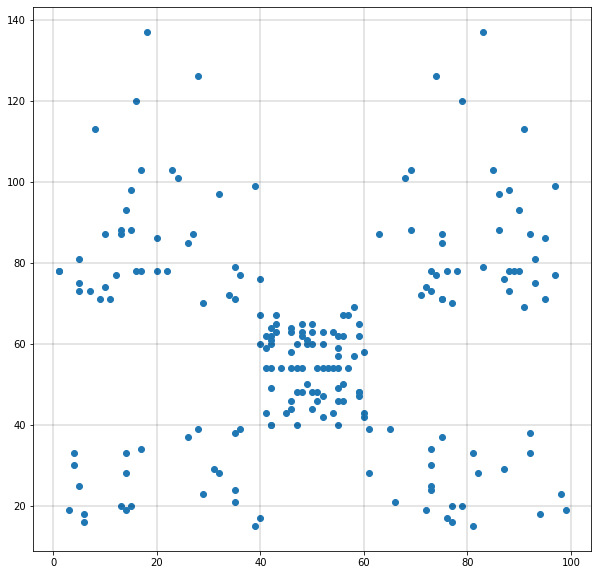

In [ ]:
# Check Relationship of Spending Score and Annual Income
fig, ax =  plt.subplots(figsize = (10,10))
ax.scatter(df['Spending Score'],df['Annual Income'])
ax.grid(color='black', linestyle='-', linewidth=0.2)

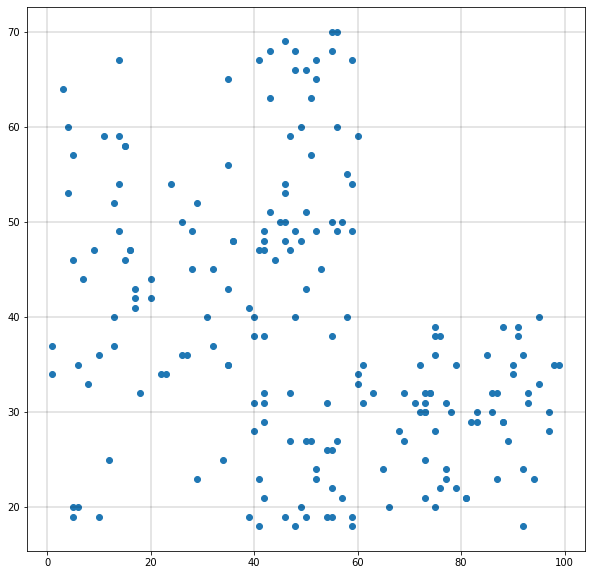

In [ ]:
# Check Relationship of Spending Score and Age
fig, ax =  plt.subplots(figsize = (10,10))
ax.scatter(df['Spending Score'],df['Age'])
ax.grid(color='black', linestyle='-', linewidth=0.2)

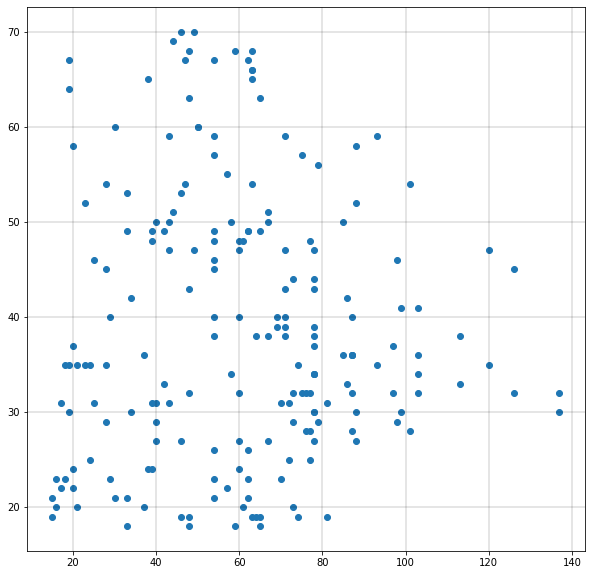

In [ ]:
# Check Relationship of Annual Income and Age
fig, ax =  plt.subplots(figsize = (10,10))
ax.scatter(df['Annual Income'],df['Age'], label = df["Gender"])
ax.grid(color='black', linestyle='-', linewidth=0.2)

We would create clusters for each relationship

### Feature Engineering 

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Encode Gender Column
df["Gender"] = df["Gender"].astype('category')

In [ ]:
df["Gender"].dtypes

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [ ]:
df["Gender_enc"] = df["Gender"].cat.codes

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Gender_enc
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
# Drop Gender Column
df = df.drop("Gender", axis = 1)

In [ ]:
# Drop CustomerID Column
df = df.drop("CustomerID", axis = 1)

In [ ]:
df.head()

,Age,Annual Income,Spending Score,Gender_enc
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
# Scale DataFrame
Scaler = MinMaxScaler()
scaled = Scaler.fit_transform(df)
scaled

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

In [ ]:
# Convert array to DataFrame
df = pd.DataFrame(scaled, columns = df.columns)

In [ ]:
df.head()

,Age,Annual Income,Spending Score,Gender_enc
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


### Model Building

In [ ]:
# Clustering for Relationship 1 (Spending Score and Annual Income)
Features_1 = df[['Spending Score', 'Annual Income']]

In [ ]:
model_1 = KMeans(n_clusters= 5)
model_1.fit(Features_1)

KMeans(n_clusters=5)

In [ ]:
# Prediction
cluster = model_1.predict(Features_1)
cluster

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
Features_1["Cluster"] = cluster

<ipython-input-54-450ca202a064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features_1["Cluster"] = cluster


In [ ]:
Features_1

,Spending Score,Annual Income,Cluster
0,0.387755,0.000000,0
1,0.816327,0.000000,2
2,0.051020,0.008197,0
3,0.775510,0.008197,2
4,0.397959,0.016393,0
...,...,...,...
195,0.795918,0.860656,1
196,0.275510,0.909836,3
197,0.744898,0.909836,1
198,0.173469,1.000000,3


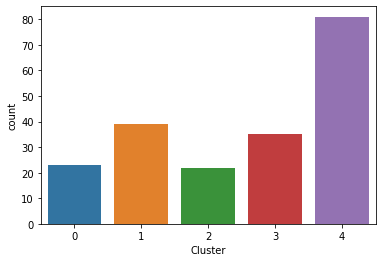

In [ ]:
# Visualizing the cluster distribution
sns.countplot(x = 'Cluster', data = Features_1)

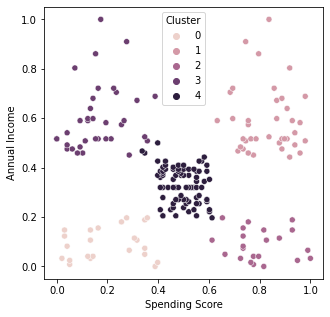

In [ ]:
# Check Relationship of Spending Score and Annual Income
plt.figure(figsize = (5,5))
sns.scatterplot(data = Features_1, x = "Spending Score",y = "Annual Income", hue = "Cluster")

In [ ]:
# Getting the optimum nos of clusters
sum_sqr_dis = []
k_range = range(1,10)
for k in k_range:
  km_model_1 = KMeans(n_clusters= k)
  km_model_1.fit(Features_1)
  sum_sqr_dis.append(km_model_1.inertia_)

In [ ]:
sum_sqr_dis

[450.32072032604003,
 88.91918219063196,
 50.04398689950475,
 21.15454381691513,
 3.5831179059525606,
 3.113525936260507,
 2.675890088662075,
 2.2795374642963813,
 1.9390521475256999]

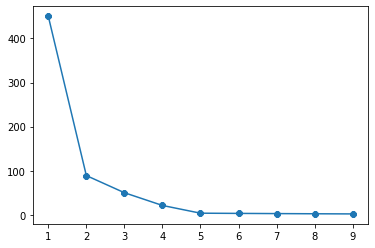

In [ ]:
plt.plot(k_range, sum_sqr_dis, marker = "8")


###**5** is the Optimal nos of clusters

In [ ]:
print(km_model_1.cluster_centers_)

[[5.22824919e-01 2.65962036e-01 4.00000000e+00]
 [8.25437318e-01 5.16686183e-01 1.00000000e+00]
 [2.14285714e-01 7.76229508e-01 3.00000000e+00]
 [3.29313544e-01 1.08047690e-01 4.44089210e-16]
 [7.99628942e-01 8.79284650e-02 2.00000000e+00]
 [1.44489796e-01 5.29508197e-01 3.00000000e+00]
 [4.70574276e-01 3.87152116e-01 4.00000000e+00]
 [8.75850340e-02 7.85519126e-02 4.44089210e-16]
 [8.33951763e-01 7.63785395e-01 1.00000000e+00]]


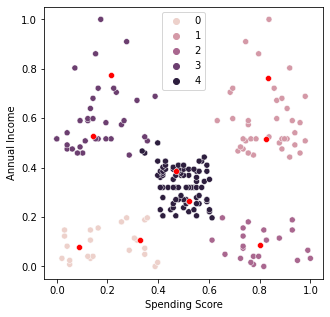

In [ ]:
# Check Relationship of Spending Score and Annual Income
plt.figure(figsize = (5,5))
sns.scatterplot(data = Features_1, x = "Spending Score",y = "Annual Income", hue = "Cluster", cmap = "rainbow")
sns.scatterplot(x = km_model_1.cluster_centers_[:,0] , y = km_model_1.cluster_centers_[:,1], color = "red" )


In [ ]:
# Clustering for Relationship 2 (Spending Score and Age)
Features_2 = df[['Spending Score', 'Age']]
Features_2.head()

,Spending Score,Age
0,0.387755,0.019231
1,0.816327,0.057692
2,0.051020,0.038462
3,0.775510,0.096154
4,0.397959,0.250000


In [ ]:
model_2 = KMeans(n_clusters= 6)
model_2.fit(Features_2)

KMeans(n_clusters=6)

In [ ]:
# Prediction
cluster_2 = model_2.predict(Features_2)
cluster_2

array([0, 2, 4, 2, 0, 2, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 0, 3, 2, 4, 2,
       3, 2, 3, 2, 1, 0, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 5, 2, 1, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 5, 1, 1, 1, 5, 0, 1, 5, 0, 5, 1, 5, 0,
       1, 5, 0, 0, 5, 1, 5, 5, 5, 0, 1, 1, 0, 1, 5, 1, 5, 1, 0, 1, 1, 0,
       0, 1, 5, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 5, 0, 1, 0, 5, 1, 5, 5,
       5, 0, 1, 0, 0, 0, 5, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 4, 2, 3, 2, 4, 2, 3, 2, 0, 2, 4, 2, 1, 2, 4, 2, 4, 2, 3, 2,
       3, 2, 4, 2, 4, 2, 1, 2, 4, 2, 3, 2, 4, 2, 4, 0, 4, 2, 4, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 2, 1, 2,
       4, 2], dtype=int32)

In [ ]:
Features_2["Cluster"] = cluster_2

<ipython-input-66-fa77a35b3a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features_2["Cluster"] = cluster_2


In [ ]:
Features_2

,Spending Score,Age,Cluster
0,0.387755,0.019231,0
1,0.816327,0.057692,2
2,0.051020,0.038462,4
3,0.775510,0.096154,2
4,0.397959,0.250000,0
...,...,...,...
195,0.795918,0.326923,2
196,0.275510,0.519231,1
197,0.744898,0.269231,2
198,0.173469,0.269231,4


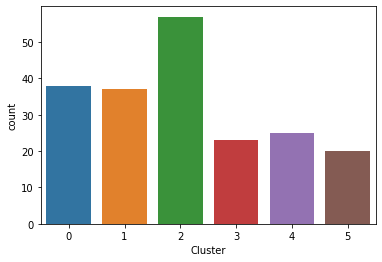

In [ ]:
# Visualizing the cluster distribution
sns.countplot(x = 'Cluster', data = Features_2)

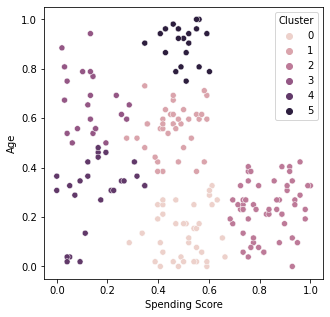

In [ ]:
# Check Relationship of Spending Score and Age
plt.figure(figsize = (5,5))
sns.scatterplot(data = Features_2, x = "Spending Score",y = "Age", hue = "Cluster")

In [ ]:
 # Getting the optimum nos of clusters
sum_sqr_dis = []
k_range = range(1,15)
for k in k_range:
  km_model_2 = KMeans(n_clusters= k)
  km_model_2.fit(Features_2)
  sum_sqr_dis.append(km_model_2.inertia_)

In [ ]:
sum_sqr_dis

[518.1783378443154,
 152.52789722158965,
 69.78751577166511,
 39.51699587331644,
 17.37411980207734,
 3.7561445337632247,
 3.298834111841307,
 2.9002057187662498,
 2.5511839303827353,
 2.2832630802623664,
 2.0036909621697863,
 1.849910870612867,
 1.6176197372297159,
 1.4909024311105026]

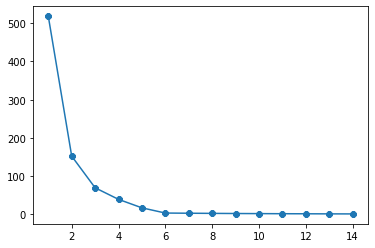

In [ ]:
plt.plot(k_range, sum_sqr_dis, marker = "8")


###**6** is the Optimal nos of clusters





In [ ]:
Features_2.head()

,Spending Score,Age,Cluster
0,0.387755,0.019231,0
1,0.816327,0.057692,2
2,0.051020,0.038462,4
3,0.775510,0.096154,2
4,0.397959,0.250000,0


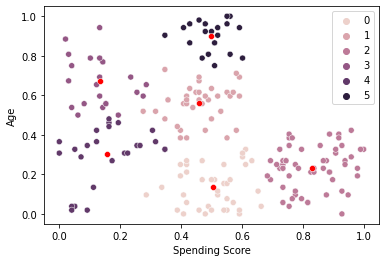

In [ ]:
# Check Relationship of Spending Score and Age
sns.scatterplot(data = Features_2, x = "Spending Score",y = "Age", hue = "Cluster", cmap = "rainbow")
sns.scatterplot(x = model_2.cluster_centers_[:,0] , y = model_2.cluster_centers_[:,1], color = "red" )


In [ ]:
# Clustering for Relationship 3 (Annual Income and Age)
Features_3 = df[['Annual Income', 'Age']]

In [ ]:
Features_3.head()

,Annual Income,Age
0,0.000000,0.019231
1,0.000000,0.057692
2,0.008197,0.038462
3,0.008197,0.096154
4,0.016393,0.250000


In [ ]:
# Getting the optimum nos of clusters
sum_sqr_dis = []
k_range = range(1,10)
for k in k_range:
  km_model_3 = KMeans(n_clusters= k)
  km_model_3.fit(Features_3)
  sum_sqr_dis.append(km_model_3.inertia_)

In [ ]:
sum_sqr_dis

[23.58390615036361,
 13.028938428018284,
 7.493024843304989,
 6.079102434458096,
 4.713416604872824,
 3.8616447037115416,
 3.0547174363693586,
 2.6460376176314386,
 2.3135720353543285]

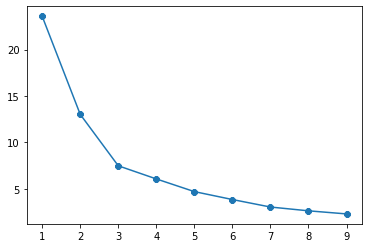

In [ ]:
plt.plot(k_range, sum_sqr_dis, marker = "8")


###**3** is the Optimal nos of clusters





In [ ]:
model_3 = KMeans(n_clusters = 3)
model_3.fit(Features_3)
cluster_3 = model_3.predict(Features_3)

In [ ]:
cluster_3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
Features_3["Cluster"] = cluster_3

<ipython-input-90-4fb9a164e66e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features_3["Cluster"] = cluster_3


In [ ]:
Features_3[Features_3["Cluster"] == 2]

,Annual Income,Age,Cluster
77,0.319672,0.423077,2
93,0.368852,0.423077,2
112,0.401639,0.384615,2
121,0.426230,0.384615,2
122,0.442623,0.423077,2
...,...,...,...
195,0.860656,0.326923,2
196,0.909836,0.519231,2
197,0.909836,0.269231,2
198,1.000000,0.269231,2


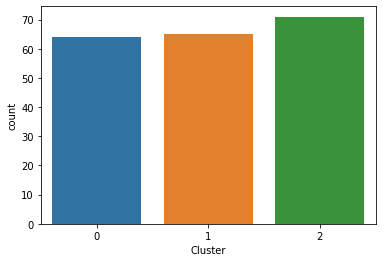

In [ ]:
# Visualizing the cluster distribution
sns.countplot(x = 'Cluster', data = Features_3)

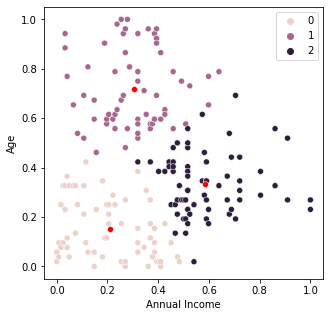

In [ ]:
# Check Relationship of Annual Income and Age
plt.figure(figsize = (5,5))
sns.scatterplot(data = Features_3, x = 'Annual Income', y = 'Age', hue = 'Cluster')
sns.scatterplot(x = model_3.cluster_centers_[:,0] , y = model_3.cluster_centers_[:,1], color = "red" )

In [ ]:
X = df.drop("Gender_enc", axis = 1)
X

,Age,Annual Income,Spending Score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features.shape)
 

Shape before PCA:  (200, 3)
Shape after PCA:  (200, 2)


In [ ]:
pca_features[:10]

array([[-0.19222109,  0.31968276],
       [-0.45817502, -0.01815154],
       [ 0.05256189,  0.55185363],
       [-0.40235654, -0.01423909],
       [-0.03164753,  0.15557819],
       [-0.40950435,  0.00685933],
       [ 0.26210486,  0.35572776],
       [-0.52164192, -0.13927039],
       [ 0.6886636 , -0.00272803],
       [-0.26989987, -0.06757168]])

In [ ]:
pca_df = pd.DataFrame(data = pca_features, columns = ['pca_1','pca_2'])
pca_df.head()

,pca_1,pca_2
0,-0.192221,0.319683
1,-0.458175,-0.018152
2,0.052562,0.551854
3,-0.402357,-0.014239
4,-0.031648,0.155578


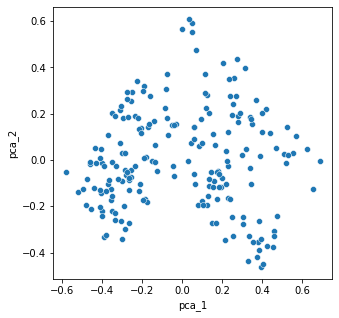

In [ ]:
# Check Relationship of X
plt.figure(figsize = (5,5))
sns.scatterplot(data = pca_df, x = "pca_1",y = "pca_2")

In [ ]:
# Getting the optimum nos of clusters
sum_sqr_dis = []
k_range = range(1,10)
for k in k_range:
  km_model_main = KMeans(n_clusters= k)
  km_model_main.fit(pca_df)
  sum_sqr_dis.append(km_model_main.inertia_)

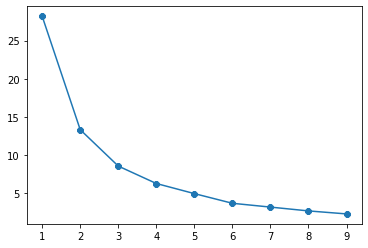

In [ ]:
plt.plot(k_range, sum_sqr_dis, marker = "8")


In [ ]:
model = KMeans(n_clusters= 3)
model.fit(pca_df)
cluster_4 = model.predict(pca_df)

In [ ]:
cluster_4


array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

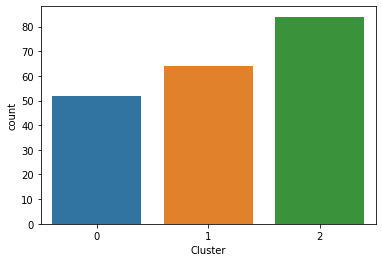

In [ ]:
# Visualizing the cluster distribution
sns.countplot(x = 'Cluster', data = pca_df)

In [ ]:
pca_df["Cluster"] = cluster_4

In [ ]:
pca_df

,pca_1,pca_2,Cluster
0,-0.192221,0.319683,0
1,-0.458175,-0.018152,2
2,0.052562,0.551854,0
3,-0.402357,-0.014239,2
4,-0.031648,0.155578,0
...,...,...,...
195,-0.264686,-0.131248,2
196,0.231202,0.118796,0
197,-0.272601,-0.051514,2
198,0.117597,0.369754,0


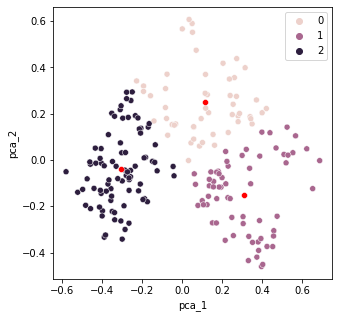

In [ ]:
# Check Relationship of X
plt.figure(figsize = (5,5))
sns.scatterplot(data = pca_df, x = "pca_1",y = "pca_2", hue = 'Cluster')
sns.scatterplot(x = model.cluster_centers_[:,0] , y = model.cluster_centers_[:,1], color = "red" )